# VARIMA Time Series Modeling Example

This notebook demonstrates how to use the `VARIMA` class from the Econometron package to fit and forecast a multivariate time series (e.g., macroeconomic data) using the data in `Z.mat`.

In [1]:
from econometron.Models.varima import VARIMA
import pandas as pd

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scipy.io as sio
mat = sio.loadmat('../Z.mat')
y=mat['Z']

In [3]:
data=pd.DataFrame(y.T)

In [4]:
# Create a date range with quarterly frequency for 117 periods
dates = pd.date_range(start='2000-01-01', periods=117, freq='Q')

# Assign the date range as the index of the dataframe
data.index = dates

In [5]:
data

,0,1,2
2000-03-31,0.026524,0.015403,0.043721
2000-06-30,0.016615,0.012219,0.021177
2000-09-30,0.018282,0.007285,-0.005417
2000-12-31,0.019048,0.005601,-0.010110
2001-03-31,0.010364,0.002916,-0.024202
...,...,...,...
2028-03-31,-0.009592,-0.008468,-0.025211
2028-06-30,-0.009626,-0.000652,-0.013926
2028-09-30,-0.009535,0.001414,-0.005745
2028-12-31,-0.009318,0.000230,-0.002464


In [6]:
varima_model = VARIMA(max_p=2,max_q=2,criterion='AIC', forecast_horizon=5, plot=True)

Processing time series for stationarity...

Processing column: 0
0 is not stationary (p-value: 0.1926)
0 becomes stationary after 1 differencing (p-value: 0.0000)


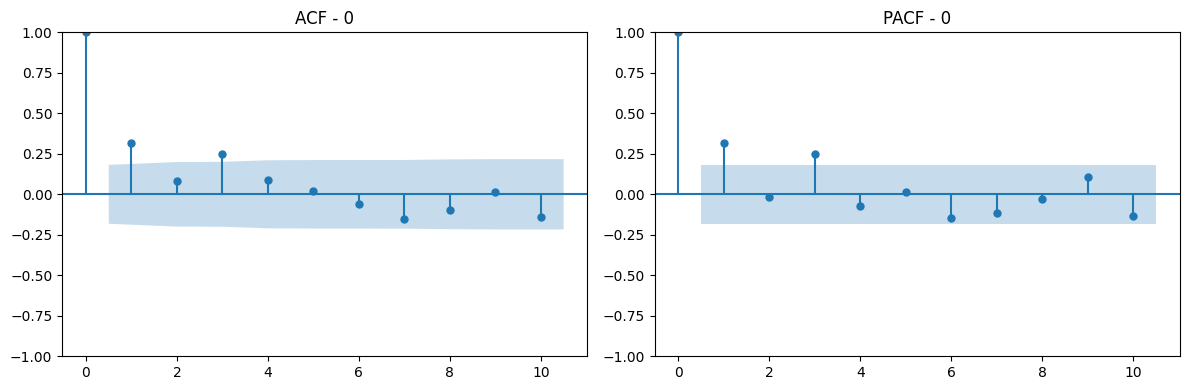


Processing column: 1
1 is stationary (p-value: 0.0328)


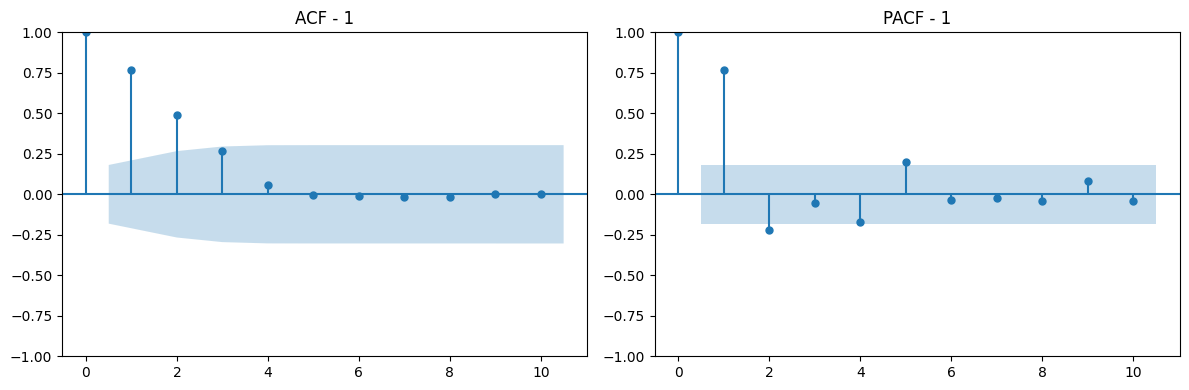


Processing column: 2
2 is stationary (p-value: 0.0018)


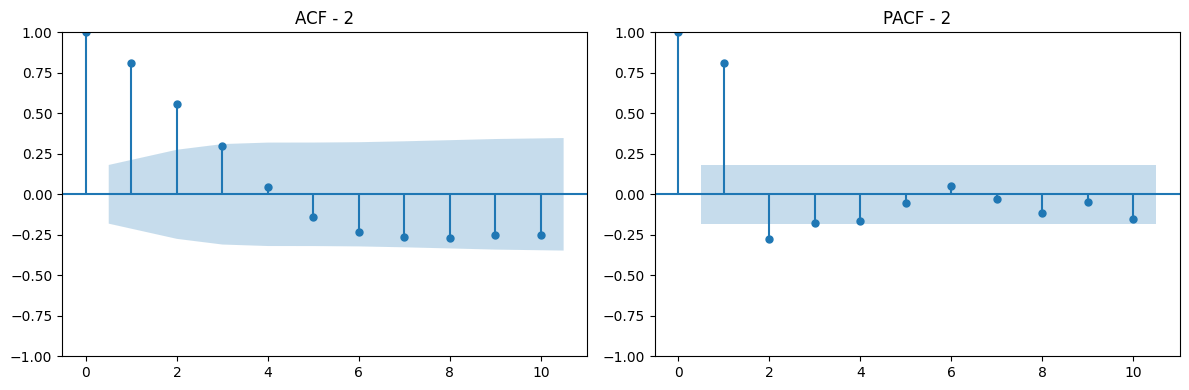

Fitting VARIMA model with 116 observations and 3 variables...
Trying VARIMA(0, d, 1)...


C:\Users\ASUS\econometron\econometron\Models\varima.py:288: RuntimeWarning: divide by zero encountered in log
  log_det = np.log(np.linalg.det(resid_cov))
C:\Users\ASUS\econometron\econometron\Models\varima.py:288: RuntimeWarning: invalid value encountered in log
  log_det = np.log(np.linalg.det(resid_cov))
C:\Users\ASUS\econometron\econometron\Models\varima.py:288: RuntimeWarning: invalid value encountered in log
  log_det = np.log(np.linalg.det(resid_cov))


  AIC: -929.5529
Trying VARIMA(0, d, 2)...
  AIC: -903.7150
Trying VARIMA(1, d, 0)...
  AIC: -903.7150
Trying VARIMA(1, d, 0)...
  AIC: -929.9993
Trying VARIMA(1, d, 1)...
  AIC: -929.9993
Trying VARIMA(1, d, 1)...
  AIC: -912.1045
Trying VARIMA(1, d, 2)...
  AIC: -912.1045
Trying VARIMA(1, d, 2)...
  AIC: -885.8338
Trying VARIMA(2, d, 0)...
  AIC: -885.8338
Trying VARIMA(2, d, 0)...
  AIC: -903.7829
Trying VARIMA(2, d, 1)...
  AIC: -903.7829
Trying VARIMA(2, d, 1)...


In [ ]:
varima_model.fit(data, date_column='', columns=[0, 1 ,2])

In [ ]:
# Forecast the next 5 periods and plot the results
forecast = varima_model.forecast(steps=5)
print("Forecasted values:")
print(forecast)

## Summary
- Loaded and visualized macroeconomic data from `Z.mat`.
- Fitted a VARIMA model with automatic order selection (AIC criterion).
- Forecasted future values and displayed the results.

You can adjust the `max_p`, `max_q`, and `columns` parameters for different model specifications or datasets.